<a href="https://colab.research.google.com/github/GreeshmaHarids/FeynnLab_Projects/blob/main/Code_Implementation_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code Implementation**
This report outlines the implementation of a synthetic data generation process and a recommendation system for a service matching application. The code demonstrates the creation of mock data for users, service providers, and service requests, followed by data visualizations and exploratory analysis. A recommendation system is implemented to match users with service providers based on their preferences and expertise, utilizing TF-IDF vectorization and cosine similarity.

##1.Data Generation
creating synthetic datasets for users, service providers, and service requests to simulate a real-world scenario.
*  User Data: Generates data for 50 users with random names, job preferences, and cities.
*   Service Provider Data: Generates data for 50 service providers with random names, expertise areas, cities, and ratings.
*   Service Request Data: Creates 2000 service requests linking users and providers with random statuses (Completed, Pending, Cancelled).







In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Initialize Faker
fake = Faker()

# Generate User Data
user_data = pd.DataFrame({
    'User_ID': range(1, 51),
    'Name': [fake.name() for _ in range(50)],
    'Preferences': [fake.job() for _ in range(50)],
    'Region': [fake.city() for _ in range(50)]
})

# Generate Service Provider Data
provider_data = pd.DataFrame({
    'Provider_ID': range(1, 51),
    'Name': [fake.name() for _ in range(50)],
    'Expertise': [fake.job() for _ in range(50)],
    'Region': [fake.city() for _ in range(50)],
    'Rating': np.random.uniform(1, 5, 50).round(1)
})

# Generate Service Request Data
num_requests = 2000
request_data = pd.DataFrame({
    'Request_ID': range(1, num_requests + 1),
    'User_ID': np.random.choice(user_data['User_ID'], num_requests),
    'Provider_ID': np.random.choice(provider_data['Provider_ID'], num_requests),
    'Status': np.random.choice(['Completed', 'Pending', 'Cancelled'], num_requests)
})


# Display the first few rows of each DataFrame
print("User Data:")
print(user_data.head())
print("\nProvider Data:")
print(provider_data.head())
print("Sample Service Request Data:")
print(request_data.head())




User Data:
   User_ID               Name                      Preferences  \
0        1     Michaela Smith                 Doctor, hospital   
1        2      Mason Sanders  Environmental education officer   
2        3    Monica Gonzalez          Rural practice surveyor   
3        4  Christopher Wiley                         Best boy   
4        5        Tamara Kidd  Runner, broadcasting/film/video   

               Region  
0        Carrollmouth  
1        Lake Bethany  
2            Bondport  
3  West Michellemouth  
4    West Jeromeshire  

Provider Data:
   Provider_ID            Name                    Expertise            Region  \
0            1  Lorraine Tapia  Civil Service fast streamer    East Joelville   
1            2   Rachel Fisher           Arts administrator        West James   
2            3      Lisa Berry     Environmental consultant          Ericaton   
3            4  Karen Anderson            Film/video editor       Kruegerstad   
4            5    Heather D

##Visualization and Exploratory Data Analysis (EDA)
Visualizations:


*   Distribution of Ratings: Used a histogram to show the frequency distribution of provider ratings.
*   Service Request Status Distribution: Created a bar chart to display the count of different service request statuses (Completed, Pending, Cancelled)

EDA:



*  Checked for Missing Values: Verified that there are no missing values in critical fields of the datasets.
*   Descriptive Statistics: Summarized key metrics, such as mean, median, and standard deviation, for the provider ratings.




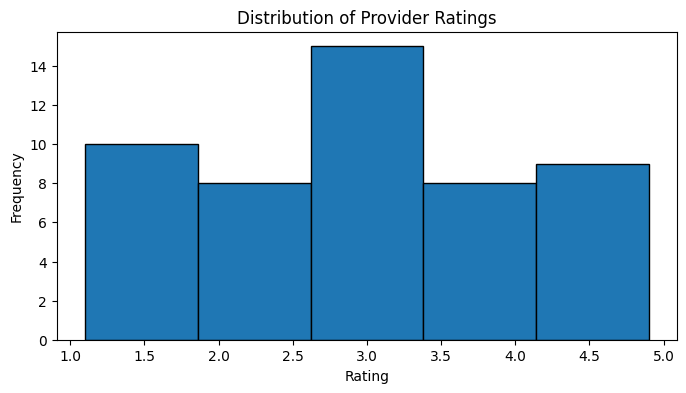

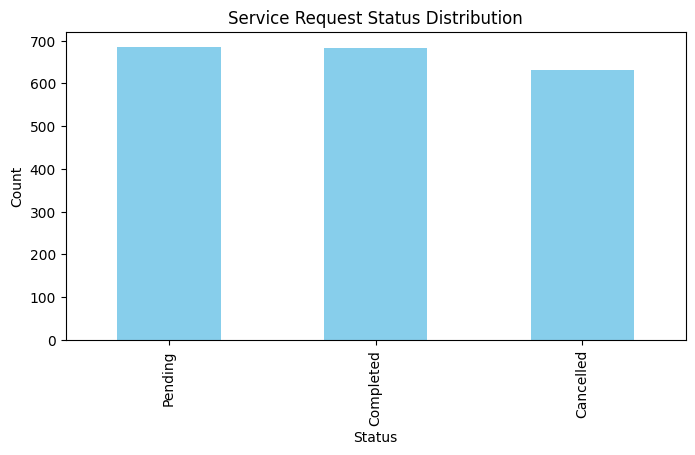

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 4))
plt.hist(provider_data['Rating'], bins=5, edgecolor='black')
plt.title('Distribution of Provider Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Status Count
plt.figure(figsize=(8, 4))
request_data['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Service Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [ ]:
# Check for Missing Values
print("Missing Values in User Data:")
print(user_data.isnull().sum())

print("\nMissing Values in Provider Data:")
print(provider_data.isnull().sum())

print("\nMissing Values in Request Data:")
print(request_data.isnull().sum())


Missing Values in User Data:
User_ID        0
Name           0
Preferences    0
Region         0
dtype: int64

Missing Values in Provider Data:
Provider_ID    0
Name           0
Expertise      0
Region         0
Rating         0
dtype: int64

Missing Values in Request Data:
Request_ID     0
User_ID        0
Provider_ID    0
Status         0
Status_Code    0
dtype: int64


In [ ]:
# Basic Descriptive Statistics
print("\nDescriptive Statistics for Provider Data:")
print(provider_data['Rating'].describe())



Descriptive Statistics for Provider Data:
count    50.000000
mean      2.996000
std       1.073419
min       1.100000
25%       2.150000
50%       3.000000
75%       3.900000
max       4.900000
Name: Rating, dtype: float64


##Recommendation System


*  TF-IDF Vectorization: Converts user preferences and provider expertise into numerical vectors.
*  Similarity Computation: Calculates the cosine similarity between user preferences and provider expertise to find the best matches.
*  Recommendation Function: Filters providers by region and ranks them based on similarity scores to recommend the top providers.





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
user_preferences = vectorizer.fit_transform(user_data['Preferences'])
provider_expertise = vectorizer.transform(provider_data['Expertise'])

# Compute Similarity Matrix
def compute_similarity(user_id):
    user = user_data[user_data['User_ID'] == user_id].iloc[0]
    user_region = user['Region']

    # Get all providers in the same region
    regional_providers = provider_data[provider_data['Region'] == user_region]

    if regional_providers.empty:
        return pd.DataFrame()  # No providers available in the region

    # Vectorize regional providers
    regional_provider_expertise = vectorizer.transform(regional_providers['Expertise'])

    # Compute similarity for regional providers
    user_preferences_vec = vectorizer.transform([user['Preferences']])
    regional_similarity_scores = cosine_similarity(user_preferences_vec, regional_provider_expertise)

    # Get top providers based on similarity
    top_indices = regional_similarity_scores[0].argsort()[::-1]
    top_providers = regional_providers.iloc[top_indices]

    return top_providers

# Example usage
user_id = 1
recommended_providers_region = compute_similarity(user_id)
print("\nRecommended Providers for User", user_id, "in the Same Region:")
print(recommended_providers_region)



Recommended Providers for User 1 in the Same Region:
Empty DataFrame
Columns: []
Index: []










*This analysis was conducted using a synthetic dataset with limited records. As a result, a thorough evaluation has not been performed. For a more complete assessment, real, larger datasets would be necessary to gain a fuller understanding of the data patterns and relationships.*